# Asrar's Topic


In [1]:
!pip install transformers

In [3]:
from transformers import pipeline
import matplotlib.pyplot as plt
from pprint import pprint
from pylab import rcParams
import numpy as np

In [4]:
rcParams['figure.figsize']=10,4

In [5]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [6]:
text="can you order some pizza "
candidata_labels=["Flight Travel","cabs Travel","Food","Movies"]
results = classifier(text, candidata_labels)
pprint(results)
print("#-------------------------------------------------------------#")
print(f"{text}")
print("التصنيفات المحتملة:")
for i, label in enumerate(results["labels"]):
    print(f"{label}: {results['scores'][i]}")

{'labels': ['Food', 'Flight Travel', 'cabs Travel', 'Movies'],
 'scores': [0.988392174243927,
            0.004190324805676937,
            0.0038885364774614573,
            0.0035290259402245283],
 'sequence': 'can you order some pizza '}
#-------------------------------------------------------------#
can you order some pizza 
التصنيفات المحتملة:
Food: 0.988392174243927
Flight Travel: 0.004190324805676937
cabs Travel: 0.0038885364774614573
Movies: 0.0035290259402245283


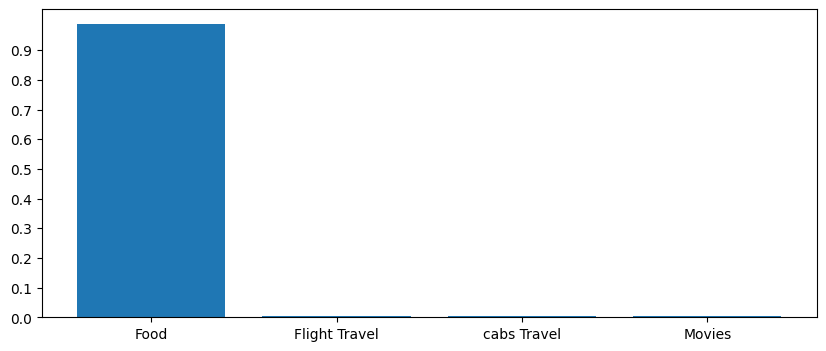

In [7]:
plt.bar(results["labels"],results["scores"])
plt.yticks(list(np.arange(0,1,0.1)))
plt.show()

In [8]:
text1="I'm so happy to see you"
candidata_labels2=["Positive","Negative"]
results2 = classifier(text1, candidata_labels2)
pprint(results2)
print("----------------------------------------------------")
print(f"{text1}")
print("التصنيفات المحتملة:")
for i, label in enumerate(results2["labels"]):
    print(f"{label}: {results['scores'][i]}")

{'labels': ['Positive', 'Negative'],
 'scores': [0.9944291114807129, 0.005570899695158005],
 'sequence': "I'm so happy to see you"}
----------------------------------------------------
I'm so happy to see you
التصنيفات المحتملة:
Positive: 0.988392174243927
Negative: 0.004190324805676937


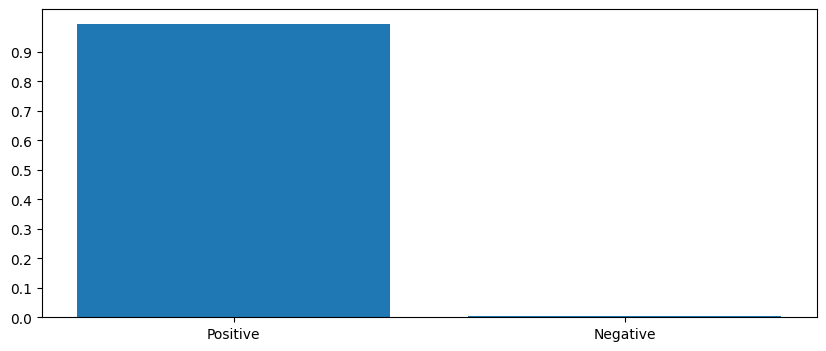

In [9]:
plt.bar(results2["labels"],results2["scores"])
plt.yticks(list(np.arange(0,1,0.1)))
plt.show()

تصنيف النص العربي

In [10]:
classifier1 = pipeline("zero-shot-classification",model="vicgalle/xlm-roberta-large-xnli-anli")

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [11]:
# النص الذي نريد تصنيفه
text3="هل يمكنك حجز تذكرة طيران"
candidata_labels3=["السفر بالطائرة","السفر بسيارة أجرة","الطعام","الأفلام"]
results3= classifier1(text3, candidata_labels3)
pprint(results3)
print("----------------------------------------------------")
print(f"{text3}")
print("التصنيفات المحتملة:")
for i, label in enumerate(results3["labels"]):
    print(f"{label}: {results3['scores'][i]}")


{'labels': ['السفر بالطائرة', 'السفر بسيارة أجرة', 'الطعام', 'الأفلام'],
 'scores': [0.9303215742111206,
            0.049202095717191696,
            0.010786352679133415,
            0.0096899988129735],
 'sequence': 'هل يمكنك حجز تذكرة طيران'}
----------------------------------------------------
هل يمكنك حجز تذكرة طيران
التصنيفات المحتملة:
السفر بالطائرة: 0.9303215742111206
السفر بسيارة أجرة: 0.049202095717191696
الطعام: 0.010786352679133415
الأفلام: 0.0096899988129735


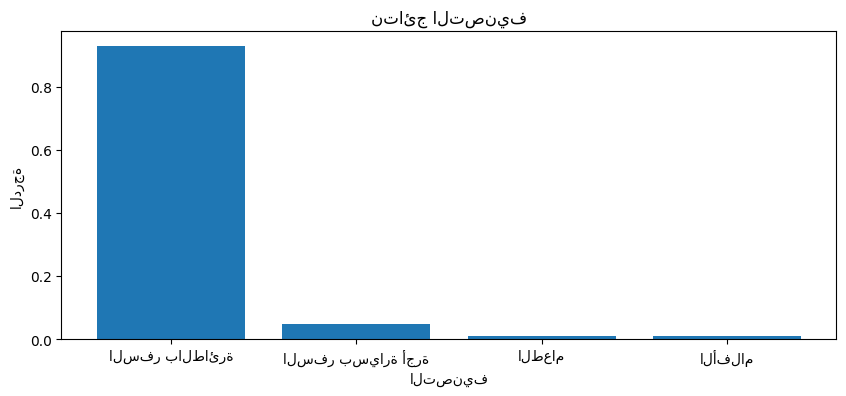

In [12]:
plt.bar(results3["labels"],results3["scores"])
plt.xlabel("التصنيف")
plt.ylabel("الدرجة")
plt.title("نتائج التصنيف")
plt.show()

بالاضافة الى التصنيف ك سلبي او ايجابي

In [13]:
sequence1="هذا المكان جدا جميل"
candidata_labels1=["ايجابي","سلبي"]
results4 = classifier1(sequence1, candidata_labels1)
pprint(results4)
print("التصنيفات المحتملة:")
for i, label in enumerate(results4["labels"]):
    print(f"{label}: {results4['scores'][i]}")

{'labels': ['ايجابي', 'سلبي'],
 'scores': [0.9985272884368896, 0.001472668256610632],
 'sequence': 'هذا المكان جدا جميل'}
التصنيفات المحتملة:
ايجابي: 0.9985272884368896
سلبي: 0.001472668256610632
